Data: https://zh.wikipedia.org/wiki/%E6%96%B0%E5%9E%8B%E5%86%A0%E7%8B%80%E7%97%85%E6%AF%92%E8%82%BA%E7%82%8E%E5%85%A8%E7%90%83%E7%96%AB%E6%83%85%E7%97%85%E4%BE%8B

Also here:
https://news.sina.cn/zt_d/yiqing0121

In [1]:
c = [
    4, 
    17,
    59,
    78, 
    92, 
    149, 
    131, 
    259, 
    444, 
    688, 
    769, 
    1771,
    1459,
    1737,
    1982,
    2182
]

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy import stats

In [3]:
total = [c[0]]
for i in c[1:]:
    total.append(total[-1] + i)
print(total)
total = total[2:]
print(total)

[4, 21, 80, 158, 250, 399, 530, 789, 1233, 1921, 2690, 4461, 5920, 7657, 9639, 11821]
[80, 158, 250, 399, 530, 789, 1233, 1921, 2690, 4461, 5920, 7657, 9639, 11821]


In [4]:
# Define confidence interval.
ci = 0.95
# Convert to percentile point of the normal distribution.
# See: https://en.wikipedia.org/wiki/Standard_score
pp = (1. + ci) / 2.
# Convert to number of standard deviations.
nstd = stats.norm.ppf(pp)
print(nstd)

1.959963984540054


# Growth total

[  1.35632447 -17.02016845]
0.9848193506159685


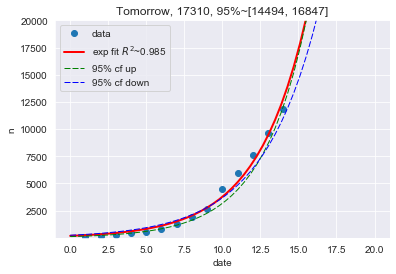

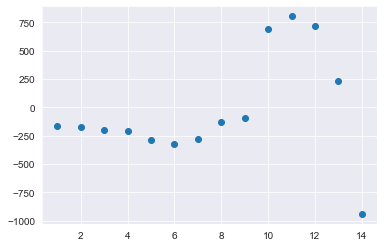

In [5]:
sns.set_style("darkgrid")
def exp(x, a, c):
    y = a ** (x - c)
    return y
    
xdata = np.arange(1, len(total)+1)
ydata = np.array(total)
# initial guess for curve fit coefficients
guess = [20, 1, 50000, 0]

popt, pcov = curve_fit(exp, xdata, ydata, sigma=np.sqrt(xdata))
print(popt)
# Standard deviation errors on the parameters.
perr = np.sqrt(np.diag(pcov))
popt_up = popt + nstd * perr
popt_down = popt - nstd * perr
# print(popt_up, popt_down)
residuals = ydata - exp(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

x = np.linspace(0, 20, 50)
y = exp(x, *popt)
tmr = len(xdata) + 1
pred = int(exp(tmr, *popt))
pred_up = int(exp(tmr, *popt_up))
pred_down = int(exp(tmr, *popt_down))

plt.plot(xdata, ydata, 'o', markersize=6., label='data')
plt.plot(x, y, label=r'exp fit $R^2$~{}'.format(round(r_squared, 3)), c='r', lw=2.)
plt.plot(x, exp(x, *popt_up), c='g', dashes=[6, 2], lw=1., label='95% cf up')
plt.plot(x, exp(x, *popt_down), c='b', dashes=[6, 2], lw=1., label='95% cf down')
plt.xlabel('date')
plt.ylabel('n')
plt.ylim(1, 2E4)
# plt.yscale('log')
plt.legend(loc='best')
plt.title("Tomorrow, {}, 95%~[{}, {}]".format(pred, pred_down, pred_up))
plt.savefig('Plots/2_1_2020.png', dpi=300)
plt.show()
plt.plot(xdata, residuals, 'o', label='residuals')
plt.show()

# Growth rate is also exp

In [6]:
# xdata = np.arange(1, len(total)+1)
# ydata = np.array(c)
# # initial guess for curve fit coefficients
# guess = [20, 1, 50000, 0]

# popt, pcov = curve_fit(exp, xdata, ydata, sigma=np.sqrt(ydata))
# print(popt)

# x = np.linspace(0, 15, 50)
# y = exp(x, *popt)

# plt.plot(xdata, ydata, 'o', label='data')
# plt.plot(x, y, label='fit')
# plt.ylim(1, 1E4)
# plt.yscale('log')
# plt.legend(loc='best')
# plt.show()

# Total can converge now

[1.58256786e+00 1.78072092e+04 8.84784302e-01 8.48455106e+00]
0.9991288790783843
19697 0
13411 14752 15746


/Users/renormalization/Git/Envs/PlayGround/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


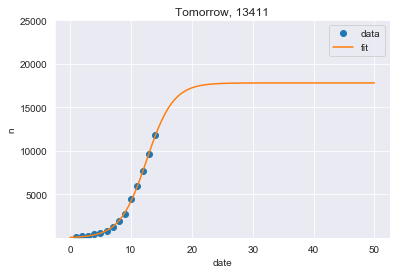

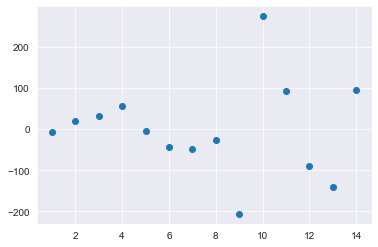

In [11]:
def sigmoid(x, a, n, b, c):
    y = n * 1 / (1  +  b * n * a ** (-c - x))
    return y

# initial guess for curve fit coefficients
ydata = np.array(total)
guess = [1, 30000, 2, 5]
popt, pcov = curve_fit(sigmoid, xdata, ydata, p0=guess, sigma=np.sqrt(xdata), bounds=([0, 1E4, 0, 0], [10, 1E6, 20, 20]))
print(popt)

residuals = ydata - sigmoid(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

perr = np.sqrt(np.diag(pcov))
popt_up = popt + nstd * perr
popt_down = popt - nstd * perr

x = np.linspace(0, 50, 100)
y = sigmoid(x, *popt)

tmr = len(xdata) + 1
pred = int(sigmoid(tmr, *popt))
pred_up = int(sigmoid(tmr, *popt_up))
pred_down = int(sigmoid(tmr, *popt_down))
print(pred_up, pred_down)
print(pred, int(sigmoid(tmr + 1, *popt)), int(sigmoid(tmr + 2, *popt)))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(x, y, label='fit')
# plt.plot(x, sigmoid(x, *popt_up), c='g', dashes=[6, 2], lw=1., label='95% cf up')
# plt.plot(x, sigmoid(x, *popt_down), c='b', dashes=[6, 2], lw=1., label='95% cf down')
plt.title("Tomorrow, {}".format(pred))
plt.ylim(1, 2.5E4)
plt.savefig('Plots/2_1_2020_sigmoid.png', dpi=300)
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('n')
plt.show()
plt.plot(xdata, residuals, 'o', label='residuals')
plt.show()